# R Project: Ramen Data Exploration

Coded by Luna McBride

The purpose of this project is to mess with R and its syntax. R is something I have worked with only lightly in the past, so getting a better idea on how it is used is a good idea.

In [197]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages
library(dplyr) #For stronger renaming and grouping
library(ggplot2) #For stronger plotting options
library(repr) #Change plot size

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "ramen-ratings"

In [198]:
ramen <- read.csv(file = "../input/ramen-ratings/ramen-ratings.csv", stringsAsFactors = FALSE) #Read the CSV into an R variable
head(ramen) #Take a peek at the data

,Review..,Brand,Variety,Style,Country,Stars,Top.Ten
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,
2,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan-miao Noodles,Pack,Taiwan,1,
3,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,
4,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,
5,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,
6,2575,Samyang Foods,Kimchi song Song Ramen,Pack,South Korea,4.75,


---

# Clean the Data

In [199]:
print(ramen[is.na(ramen)]) #Check if there are any null values in the dataset

character(0)


There are no nulls, just empty strings.

In [200]:
ramen[ramen == ""] <- "Not Applicable" #Set the empty top ten to Not Applicable, because empty ones were not distinguished as in the top 10
head(ramen) #Take a peek at the dataset

,Review..,Brand,Variety,Style,Country,Stars,Top.Ten
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,Not Applicable
2,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan-miao Noodles,Pack,Taiwan,1,Not Applicable
3,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,Not Applicable
4,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,Not Applicable
5,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,Not Applicable
6,2575,Samyang Foods,Kimchi song Song Ramen,Pack,South Korea,4.75,Not Applicable


In [201]:
print(ramen$Stars[33]) #Check the stars system
ramen[ramen == "Unrated"] <- "-1" #Give unrated ramens a -1 value for unrated
print(ramen$Stars[33]) #Check the stars system

[1] "Unrated"
[1] "-1"


---

# Data Exploration

## Star Ratings

Source Used: https://www.datamentor.io/r-programming/histogram/, https://stackoverflow.com/questions/20078107/overlay-normal-curve-to-histogram-in-r

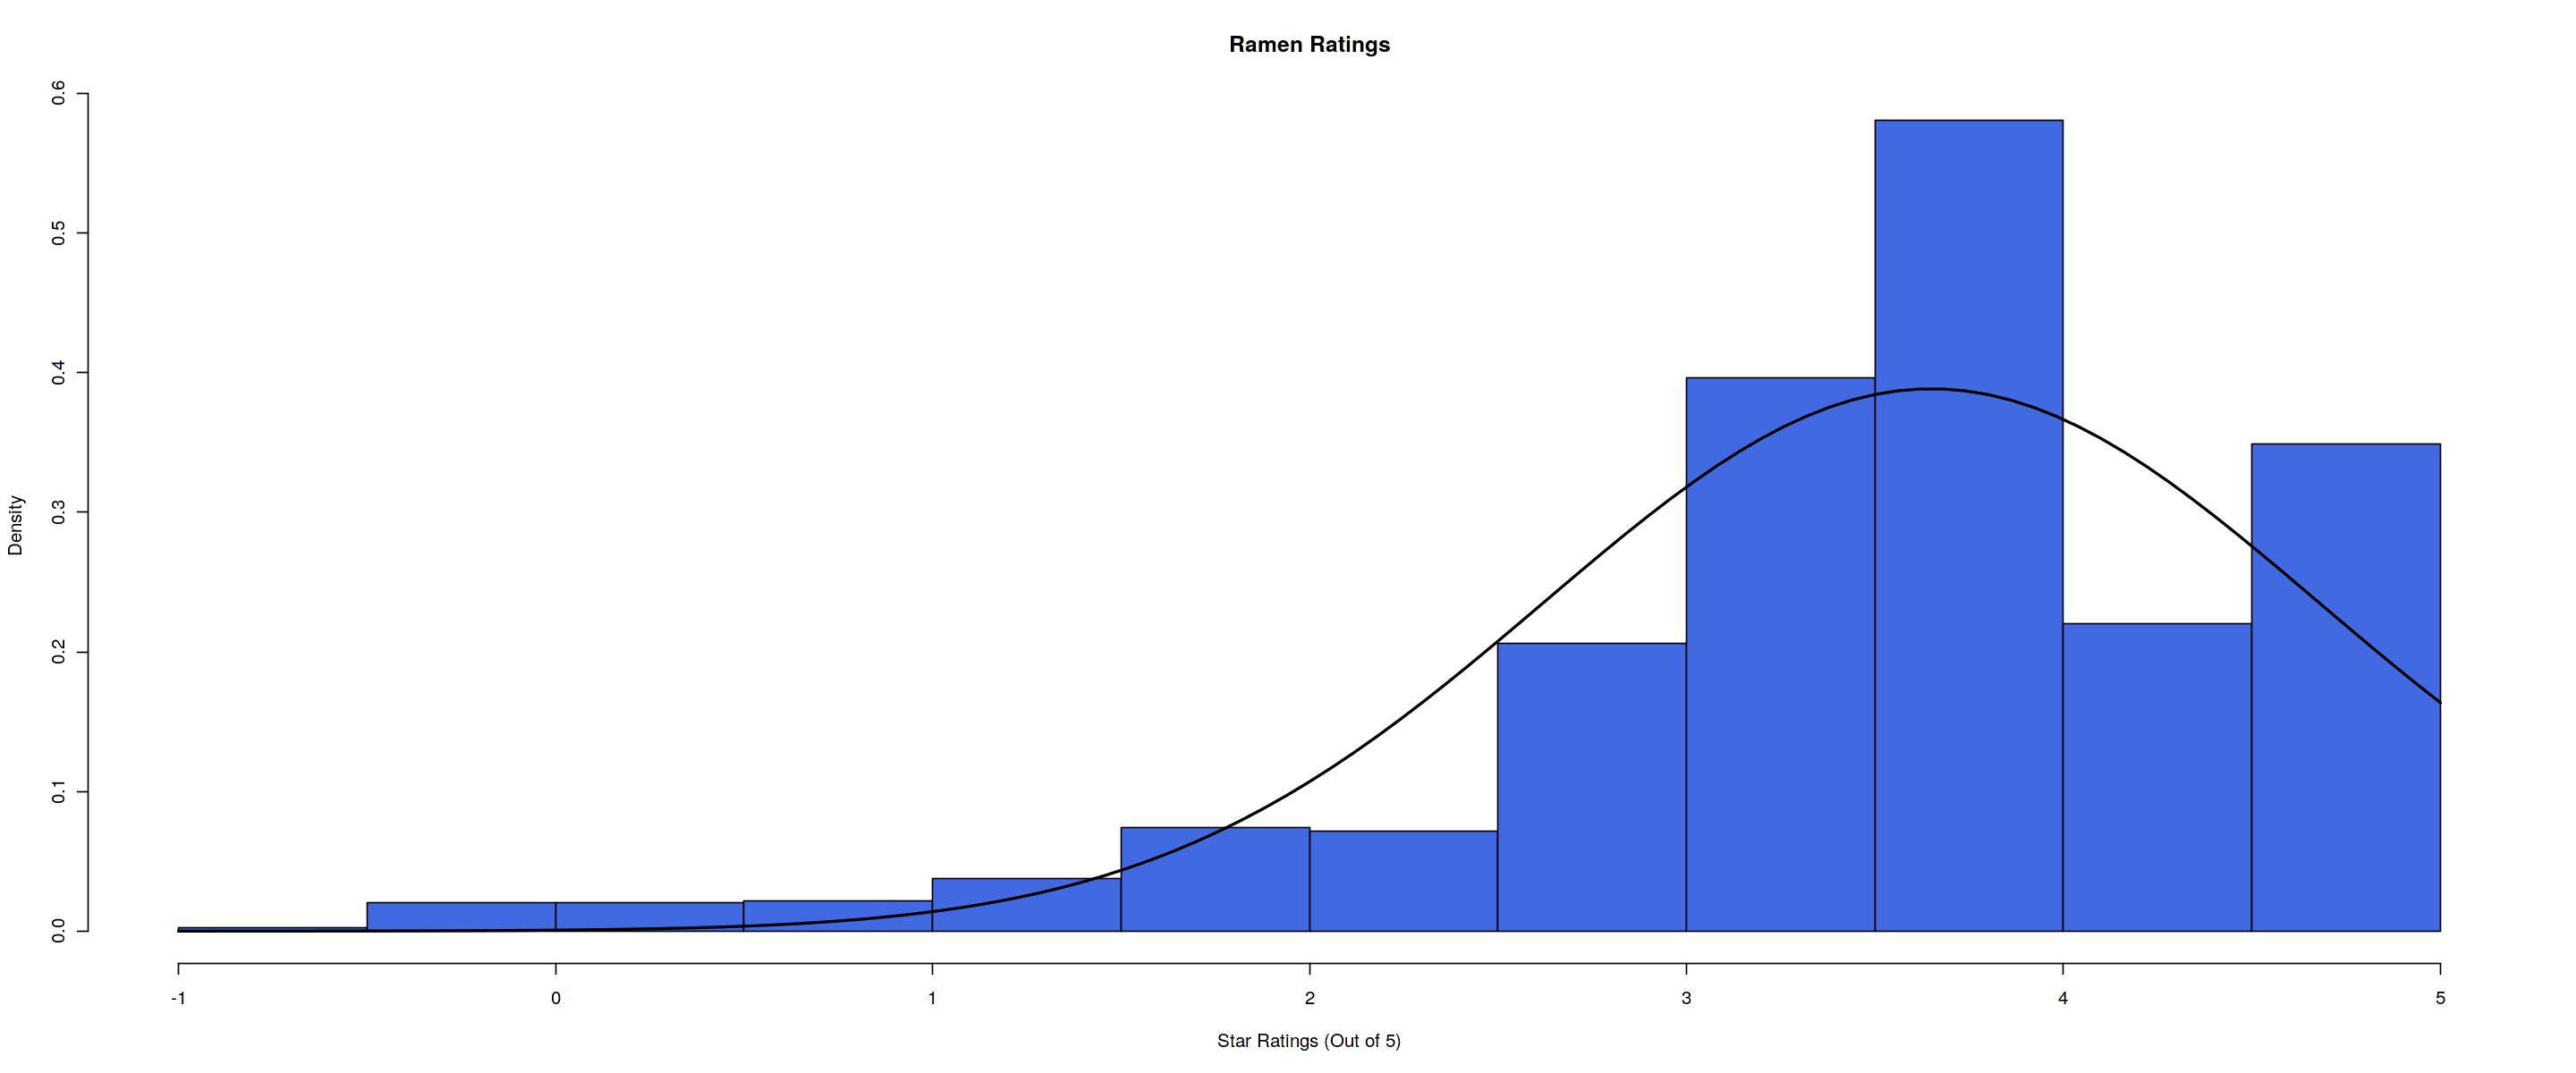

In [202]:
options(repr.plot.width = 24, repr.plot.height = 10) #Make the plot size bigger for all plots

rating <- as.numeric(ramen$Stars) #Put the star ratings into a rating variable
starMean <- mean(rating) #Take the mean of the ratings for the normal curve
starSTD <- sqrt(var(rating)) #Take the standard deviation for the normal curve

hist(rating, #Make a histogram for the ratings
    breaks = 12, #Set the number of bins to 2 per gap between numeric scores
    main = "Ramen Ratings", #Set the title of the graph to Ramen Ratings
    xlab = "Star Ratings (Out of 5)", #Set the x label to Star Ratings
    col = "royalblue", #Change the color of the histograms to royal blue
    freq = FALSE) #Force the y coordinate to be density of values rather than value frequency

curve(dnorm(x, mean = starMean, sd = starSTD), #Create a normal curve based on the mean and standard deviation of the data
      col = "black", #Make the normal curve black
      lwd = 2, #Make the normal curve thicker
      add = TRUE) #Add the curve to the graph

It appears the majority of the data is focused around mid-rated ramen (2-4). There is also a fair amount of high rated ramen (4-5), but very few lower rated ramen (0-2). This includes almost as many unrated as there are at the 0 rating mark.

## Common Ramen Type


           Bar           Bowl            Box            Can            Cup 
             1            481              6              1            450 
Not Applicable           Pack           Tray 
             2           1531            108 


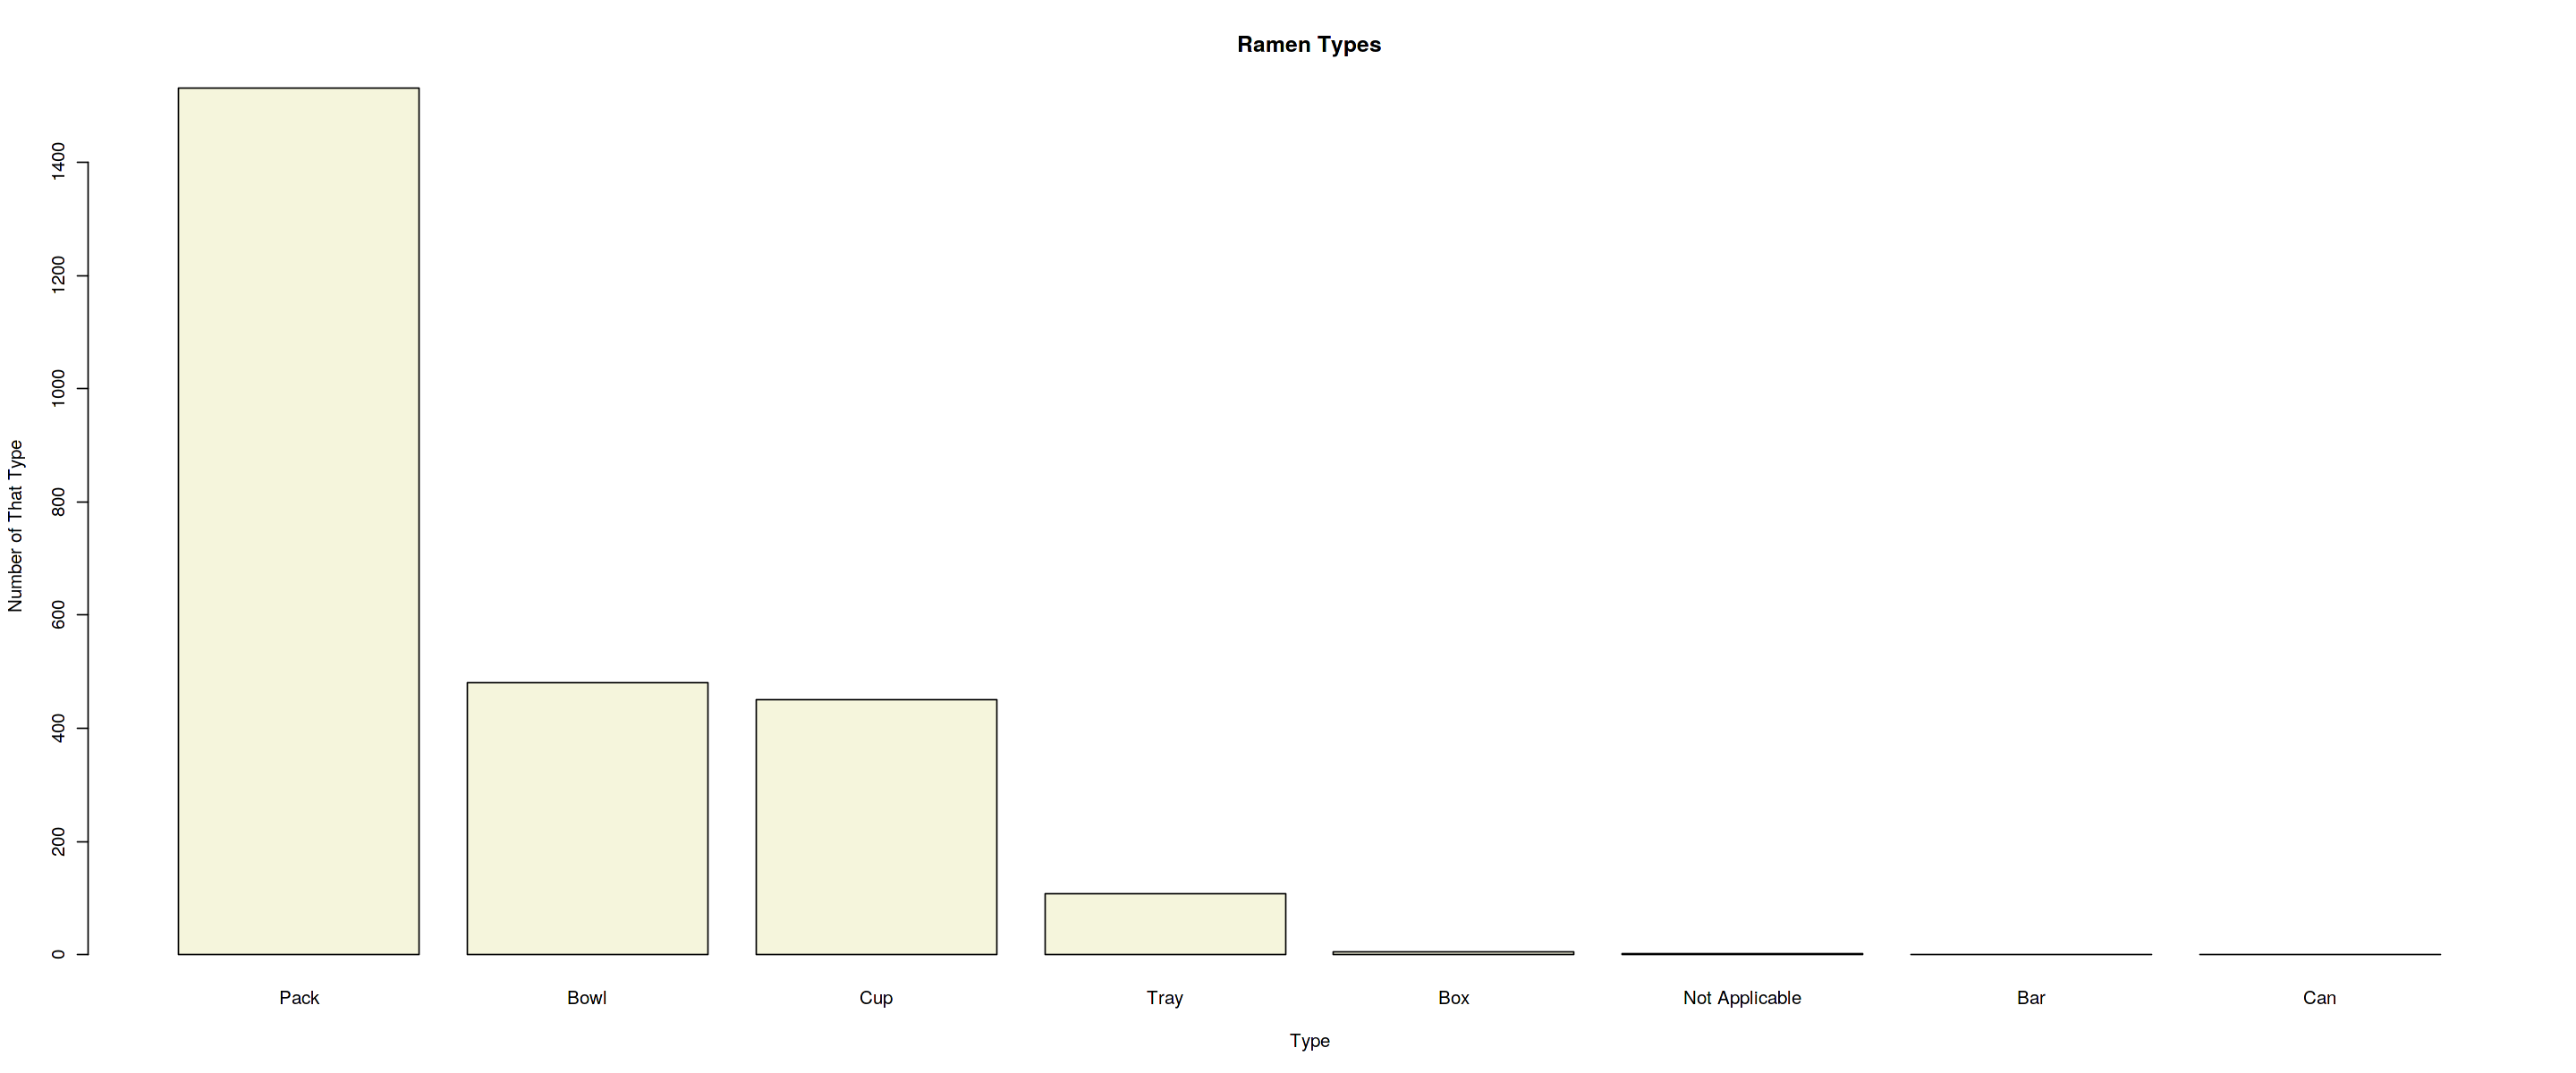

In [203]:
styles <- table(ramen$Style) #Put the styles of ramen into a table
print(styles) #Print the styles table

barplot(styles[order(styles, decreasing = TRUE)], #Create a barplot with styles in decreasing order
       main = "Ramen Types", #Add the Ramen Types title to the graph
       xlab = "Type", #Add the x label of Type
       col = "beige", #Add a beige color to the barplot, giving it a ramen-like look
       ylab = "Number of That Type") #Add the y label for the count

It appears that packs, bowls, and cups are the most common types. This is not so different from what I expected.

It is interesting, however, that canned ramen exists. I have been a lot of places in my life, yet a Kaggle dataset was the place where I learn that canned ramen exists. Well then.

## Common Brand

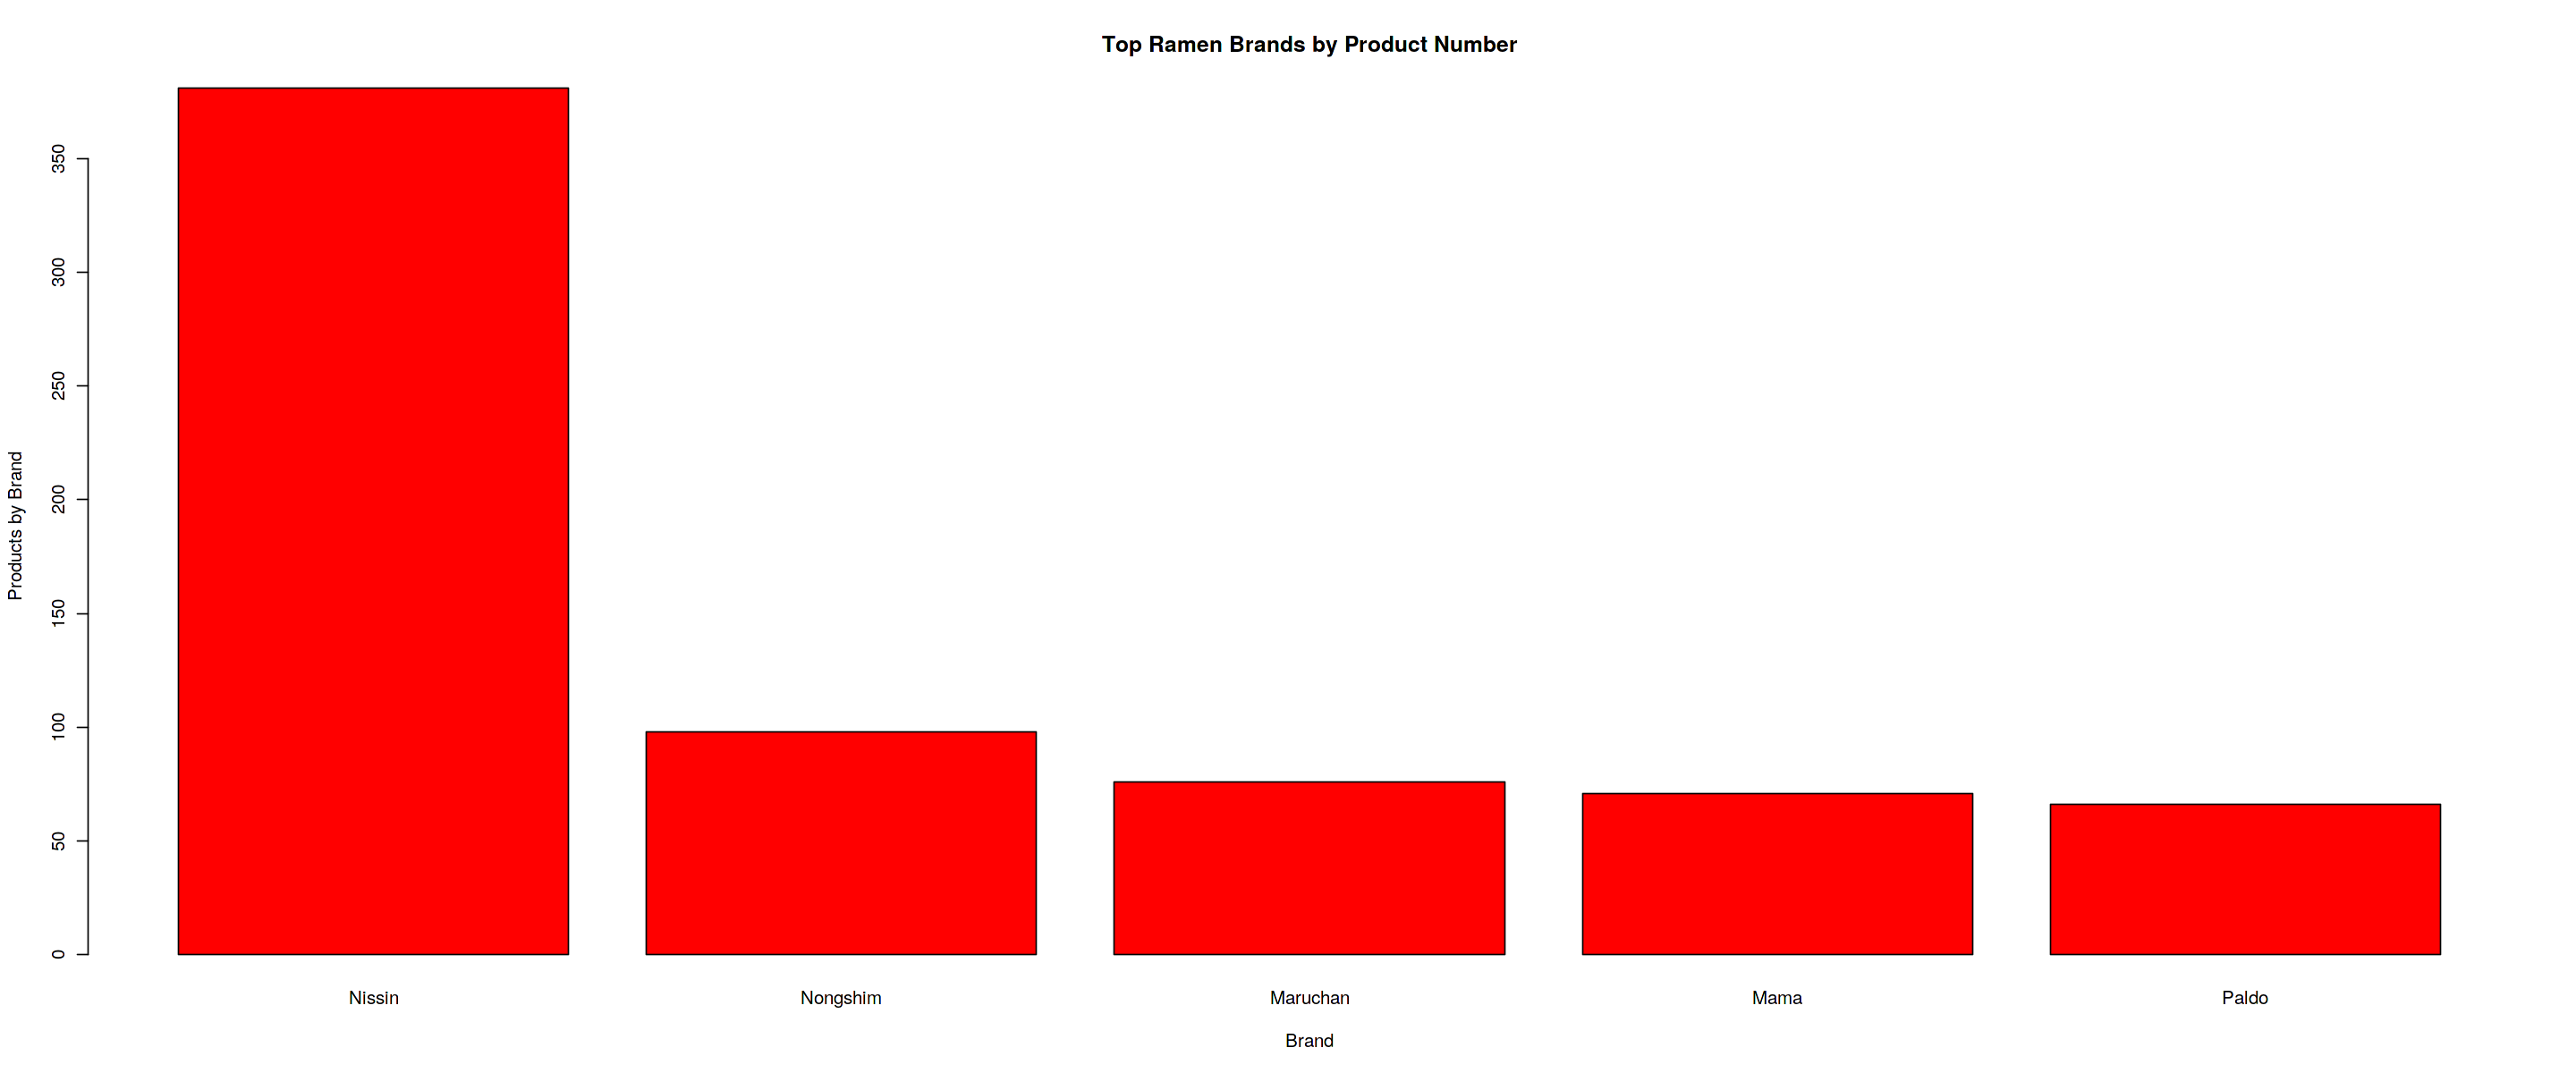

In [204]:
brands <- table(ramen$Brand) #Create a table for the list of brands

barplot(brands[order(brands, decreasing = TRUE)][0:5], #Create a barplot of brands, only taking the top 5
       main = "Top Ramen Brands by Product Number", #Add the top brands title to the graph
       xlab = "Brand", #Add the brand x label
       col = "red", #Make it red; ramen brands feel like a red color to me
       ylab = "Products by Brand") #Add the product count label

Source for rainbow colors: https://stackoverflow.com/questions/13353213/gradient-of-n-colors-ranging-from-color-1-and-color-2

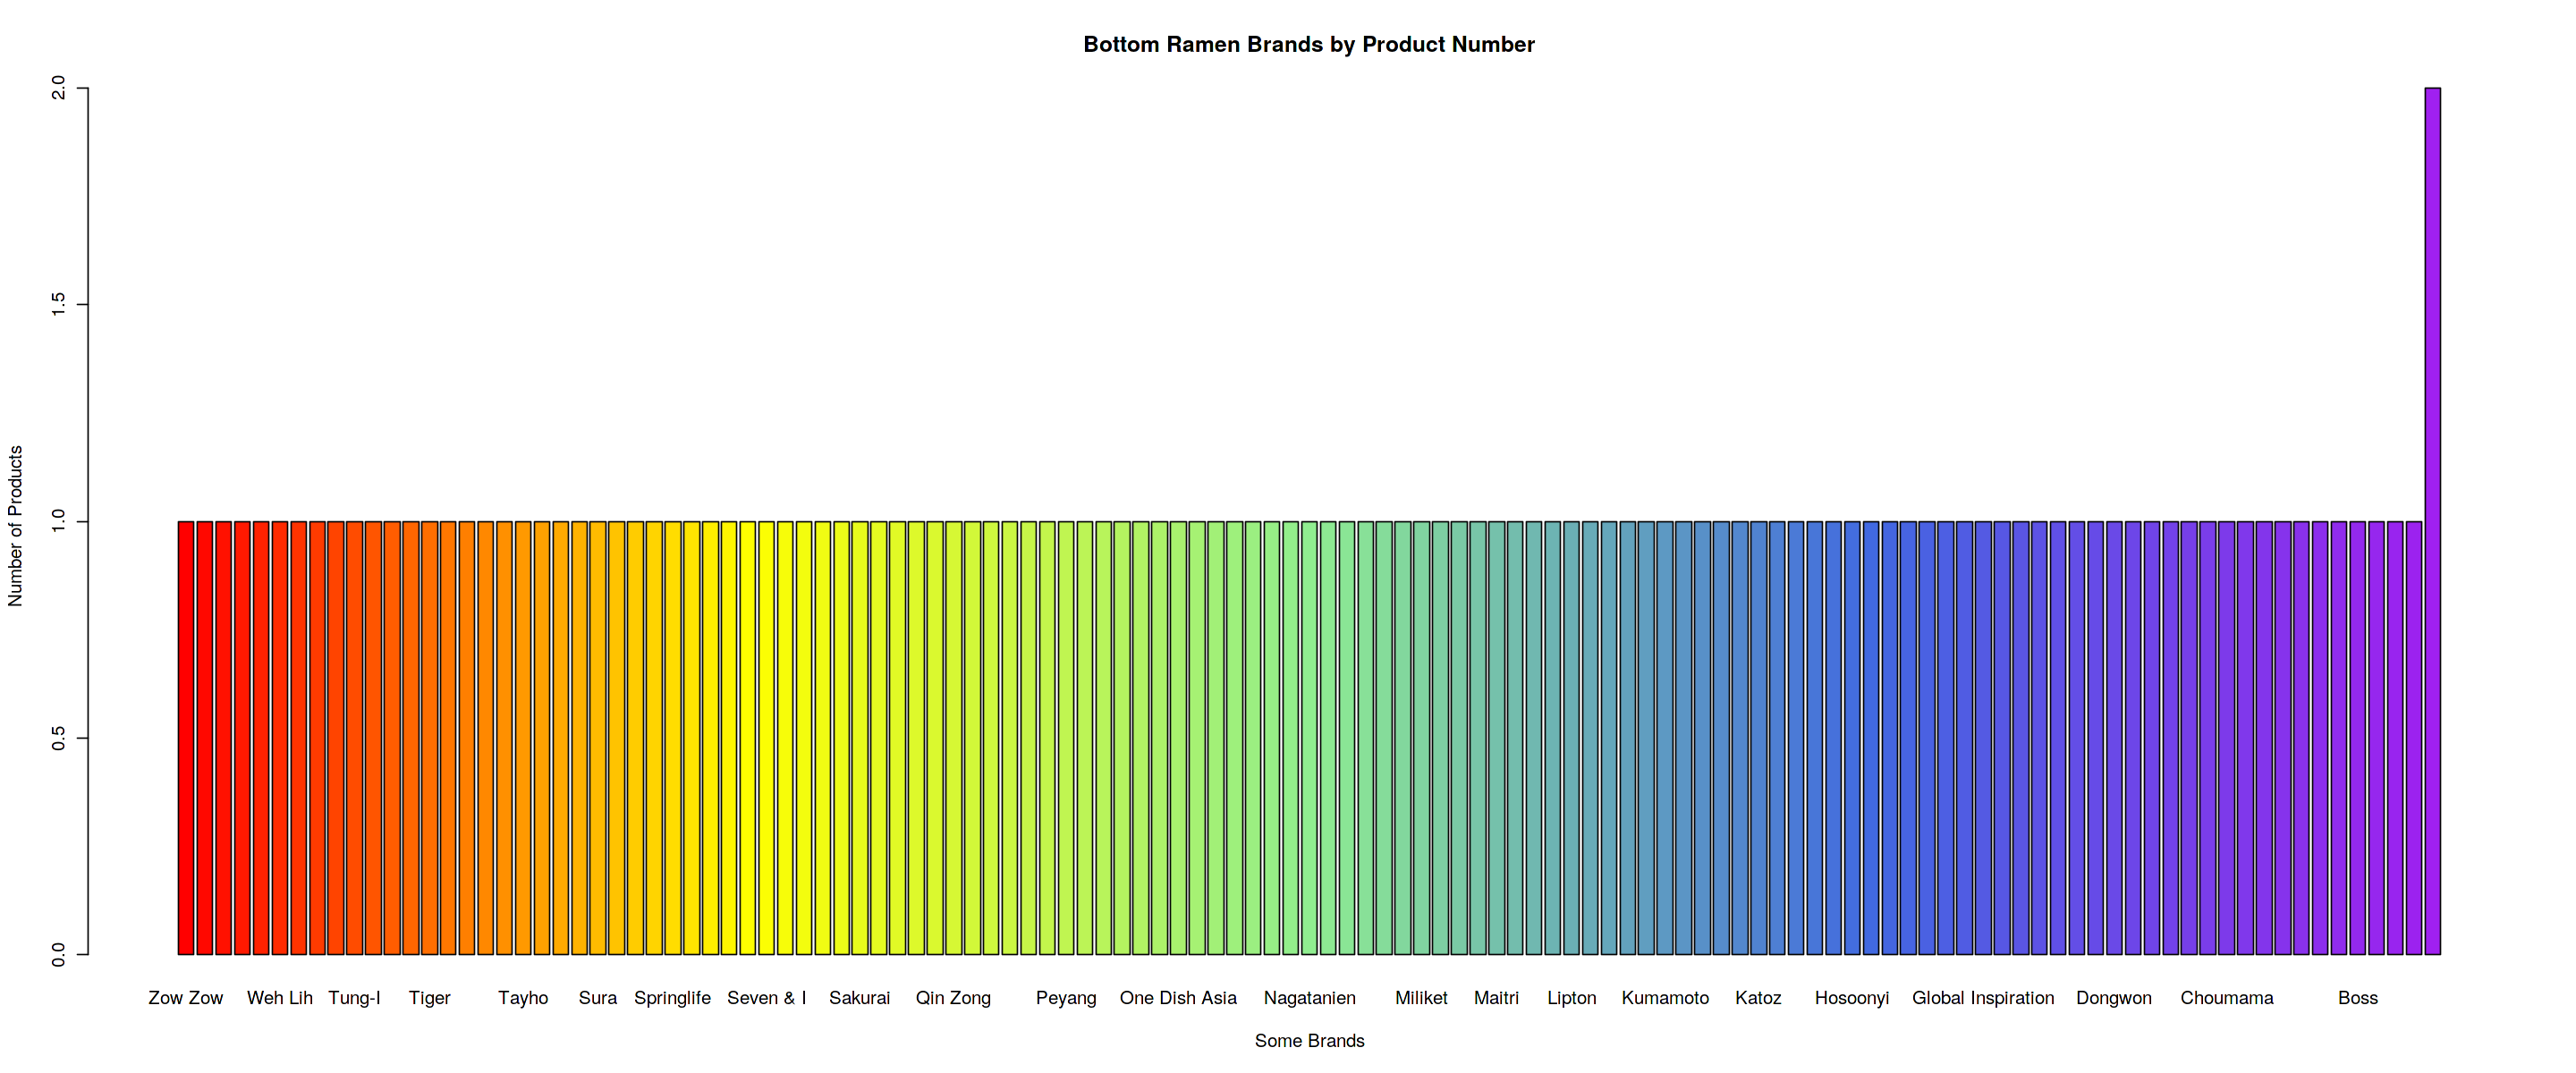

In [205]:
#Note, I just realized I could have just made decreasing false and and not did all of this, but just ignore that. Call it R practice
rowNum <- nrow(brands) #Take the overall number of rows
rowNumBottom <- rowNum - 120 #Subtract from the end until finding a brand with two products

colors <- colorRampPalette(c("red", "yellow", "lightgreen", "royalblue", "purple")) #Make a function for rainbow colors so it doesnt look like a blob
barplot(brands[order(brands, decreasing = TRUE)][rowNum : rowNumBottom], #Create a barplot with the bottom companies in terms of product number
       main = "Bottom Ramen Brands by Product Number", #Label the graph with the bottom brands by number
       xlab = "Some Brands", #Add the some brands x label
       col = (colors(121)), #Add the color gradient onto the graph
       ylab = "Number of Products") #Add the y label number of products

The top players are well defined, being the typical players of Nissin and Maruchan. 

The bottom players in terms of products is more interesting than top, however. The majority of the companies only have a single product. The dataset has 119 of those single product companies, which I have shown in the bottom chart (which is rainbow colored, as I did not want it to just look like a blob). This indicates that the bottom players can be defined as clearly as the top, but I can at least respect the sheer number of brands trying to throw their hat into the market. American stores usually just have the key players, so I can respect the areas that are fostering the market for smaller ramen brands.

## Locations

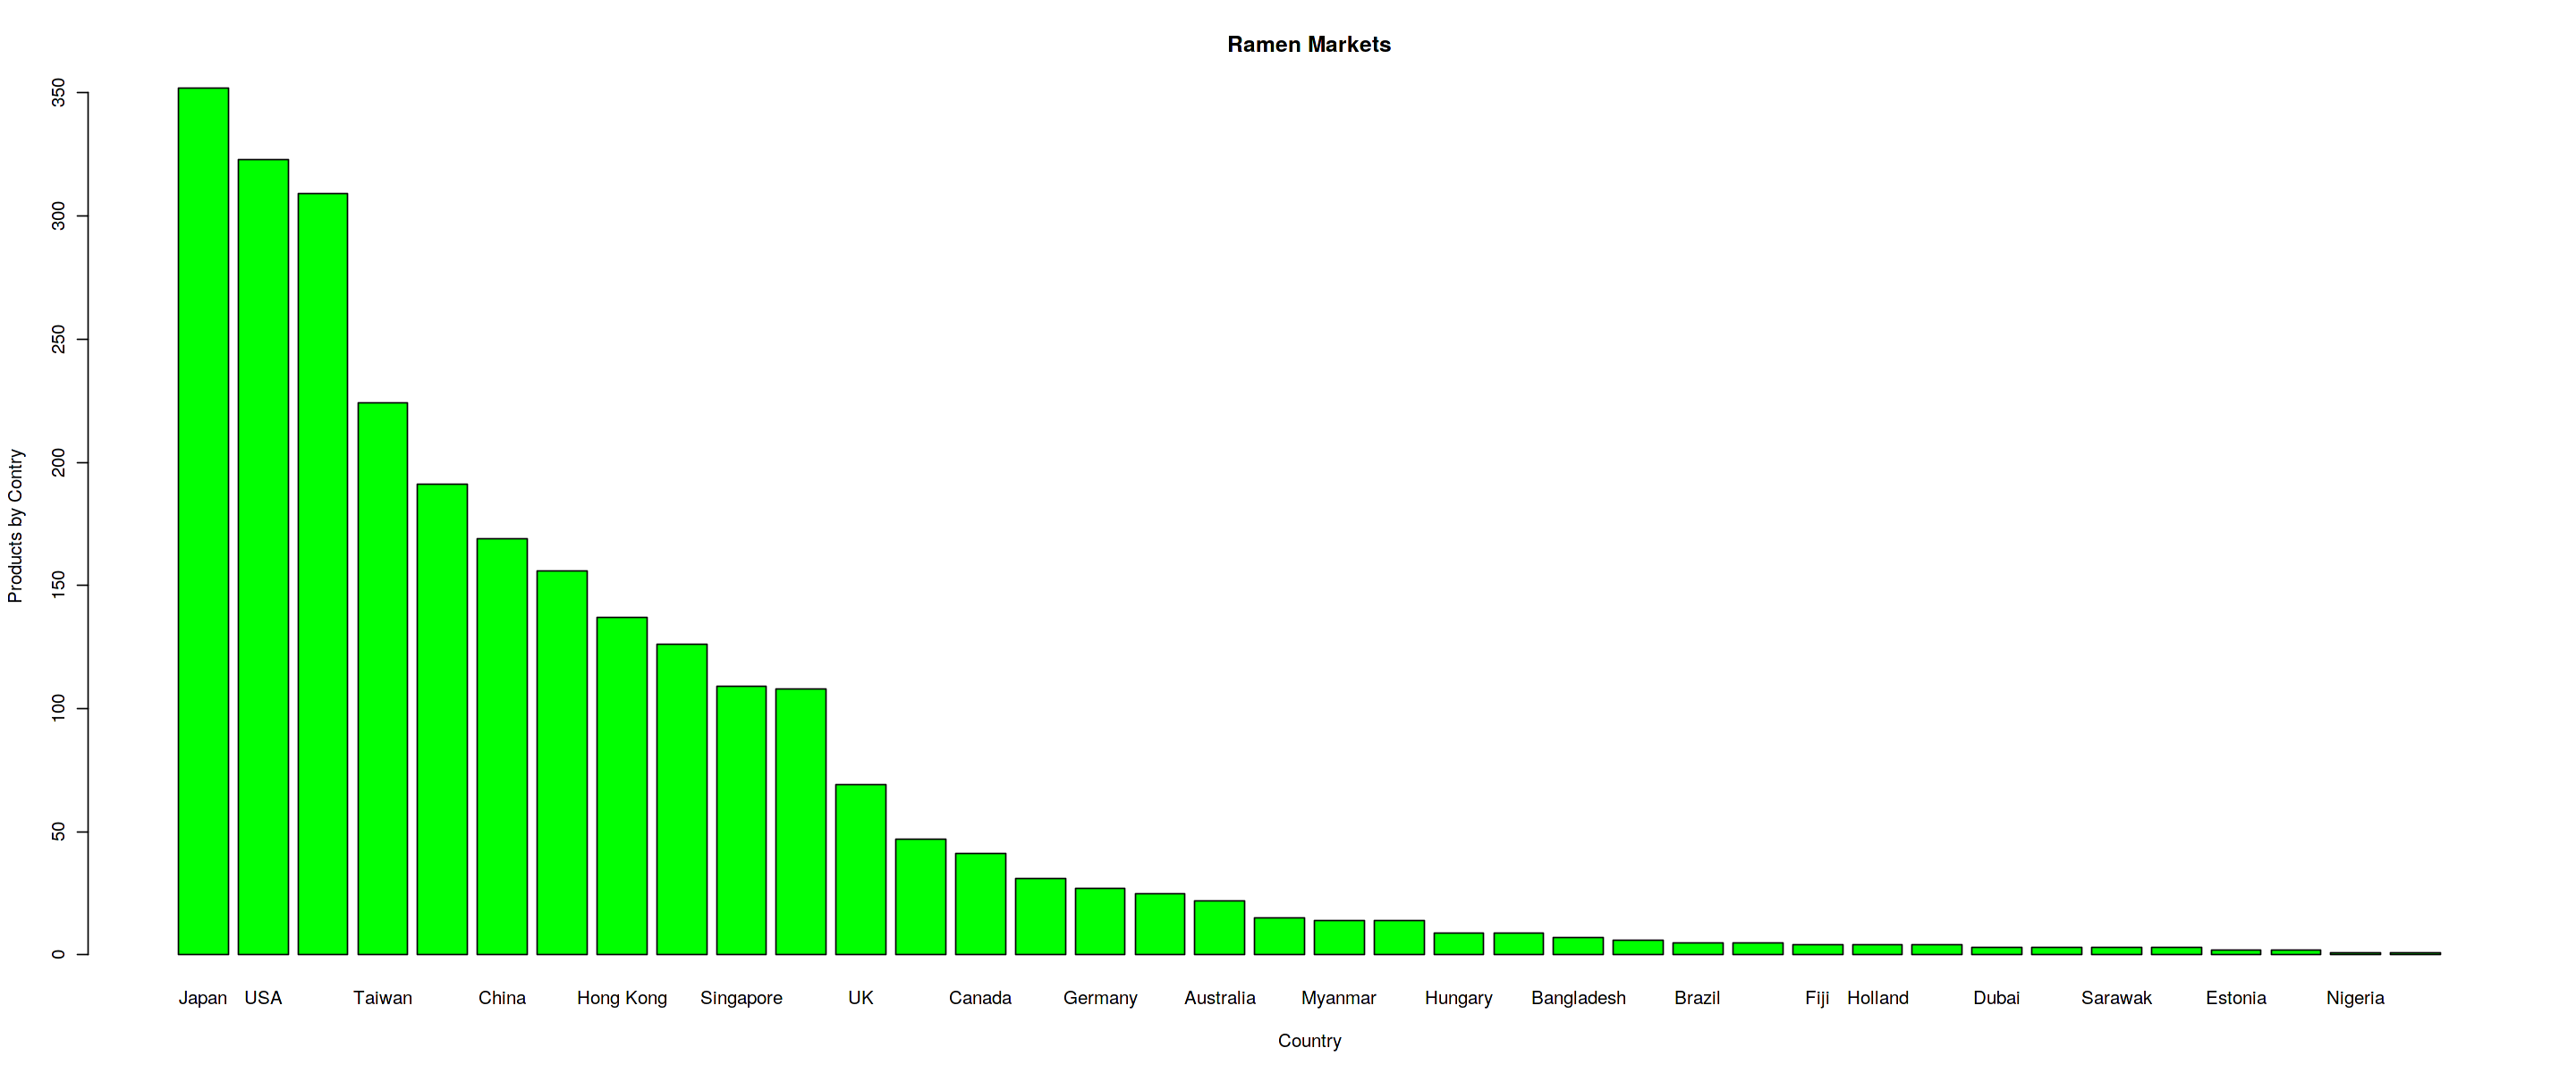

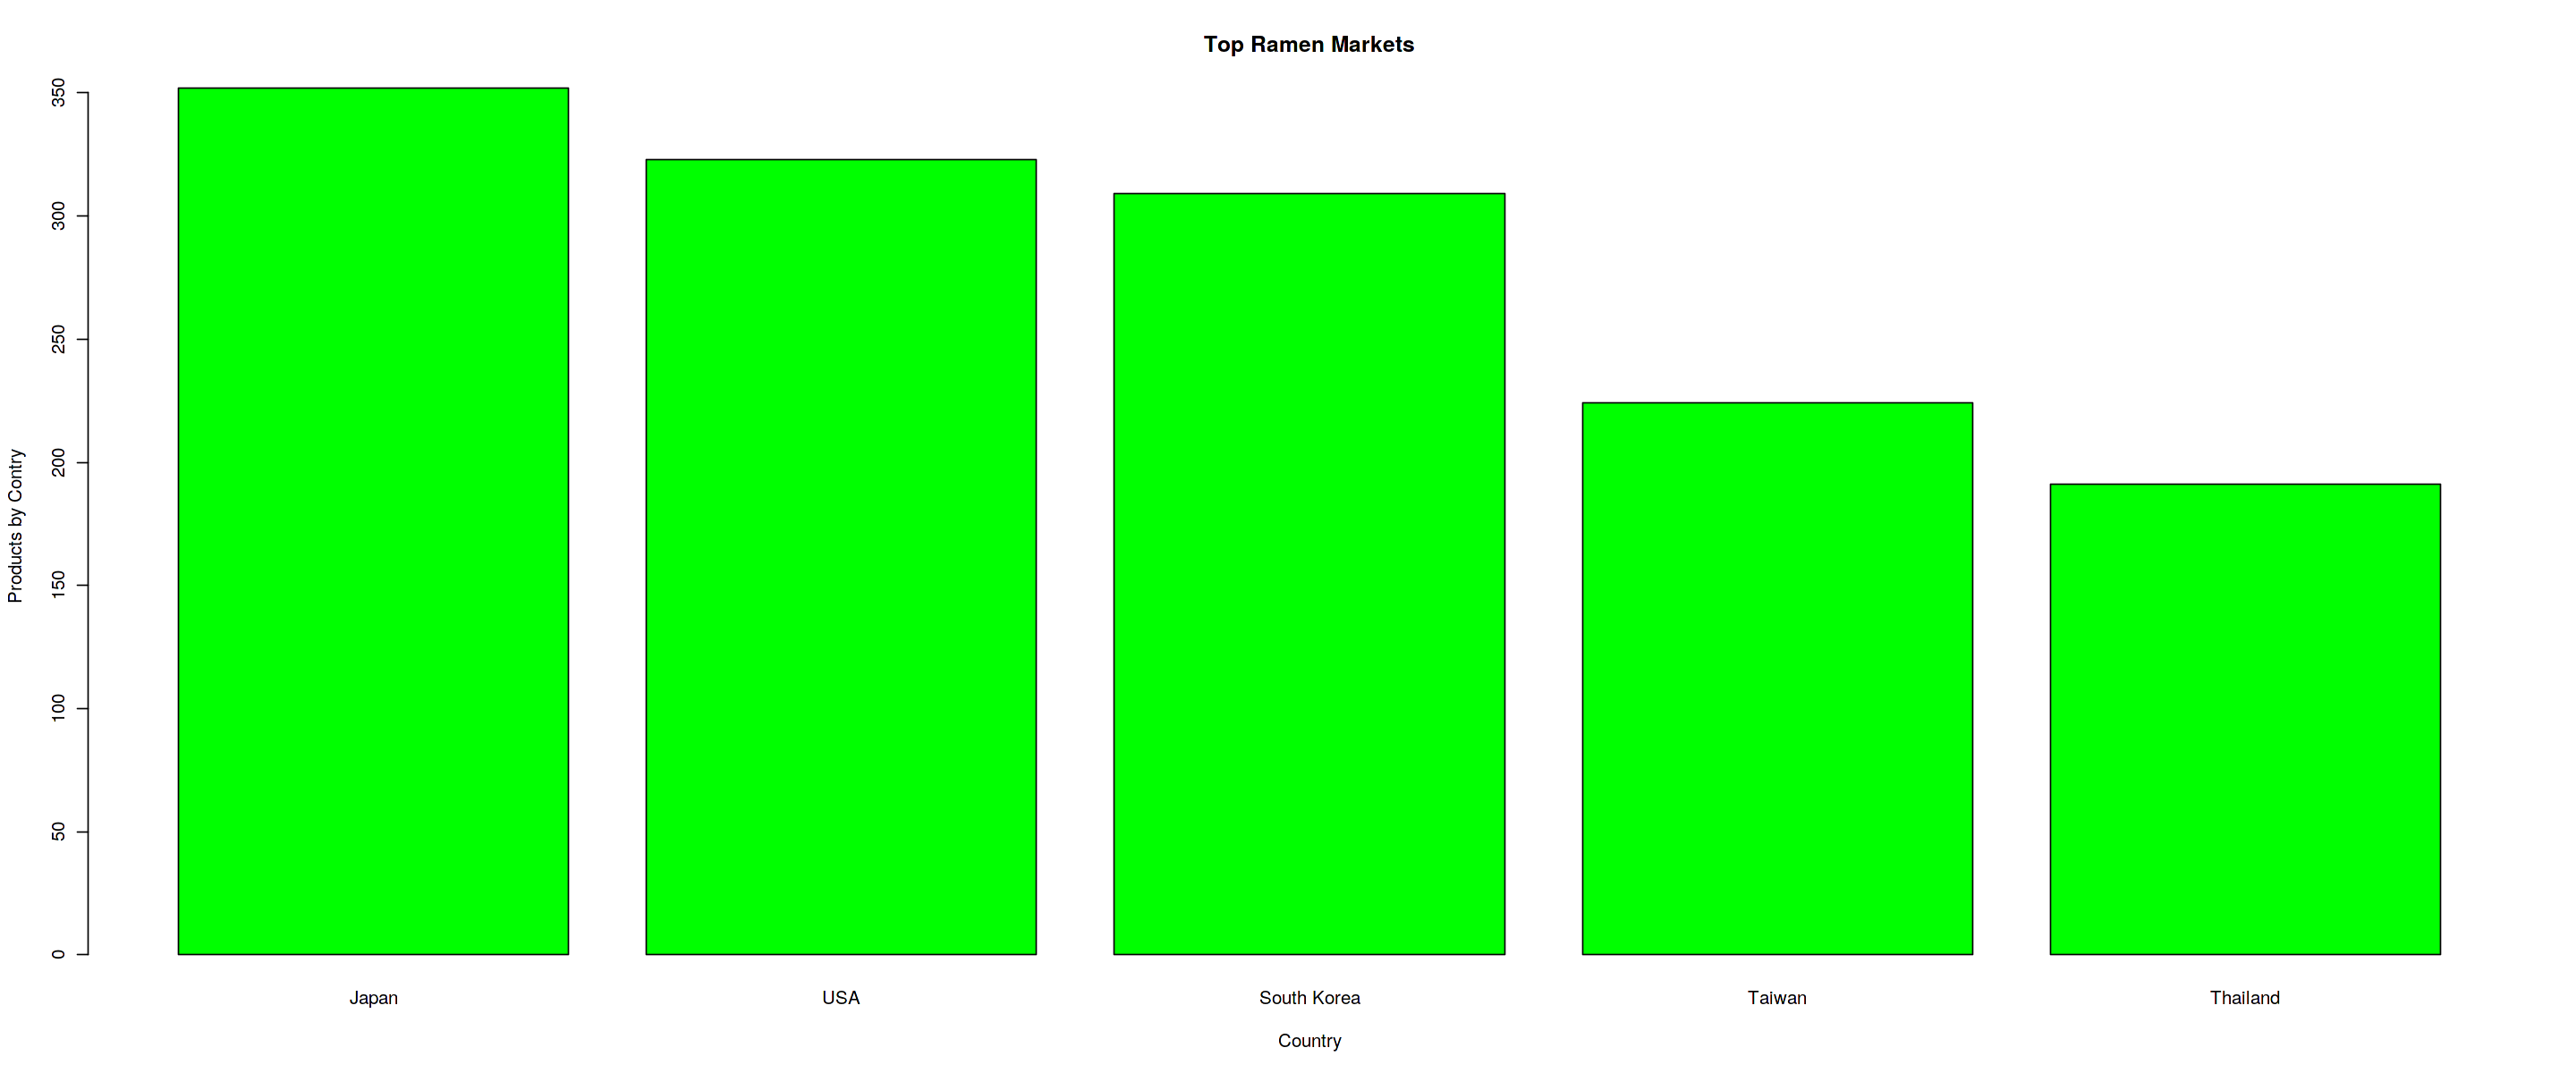

In [206]:
locs <- table(ramen$Country) #Create a table for the list of locations

#Plot for all countries with ramen products
barplot(locs[order(locs, decreasing = TRUE)], #Create a barplot of brands, only taking the top 5
       main = "Ramen Markets", #Add the markets title to the graph
       xlab = "Country", #Add the brand x label
       col = "green", #Make it red; ramen brands feel like a red color to me
       ylab = "Products by Contry") #Add the product count label

#Plot for the top 5 ramen products
barplot(locs[order(locs, decreasing = TRUE)][0:5], #Create a barplot of brands, only taking the top 5
       main = "Top Ramen Markets", #Add the top markets title to the graph
       xlab = "Country", #Add the brand x label
       col = "green", #Make it red; ramen brands feel like a red color to me
       ylab = "Products by Contry") #Add the product count label

This is both the top 5 countries and the overall graph for all of the countries. The top players being American and East Asian make sense, but I did not realize the variety of countries that have their own ramens. Pretty neat.

## Brands to Ratings

Sources: https://stackoverflow.com/questions/32141332/select-and-plot-top-frequencies-with-dplyr, https://www.kaggle.com/getting-started/105201, https://www.datanovia.com/en/blog/how-to-subset-a-dataset-when-plotting-with-ggplot2/, https://stackoverflow.com/questions/13297995/changing-font-size-and-direction-of-axes-text-in-ggplot2

`summarise()` ungrouping output (override with `.groups` argument)



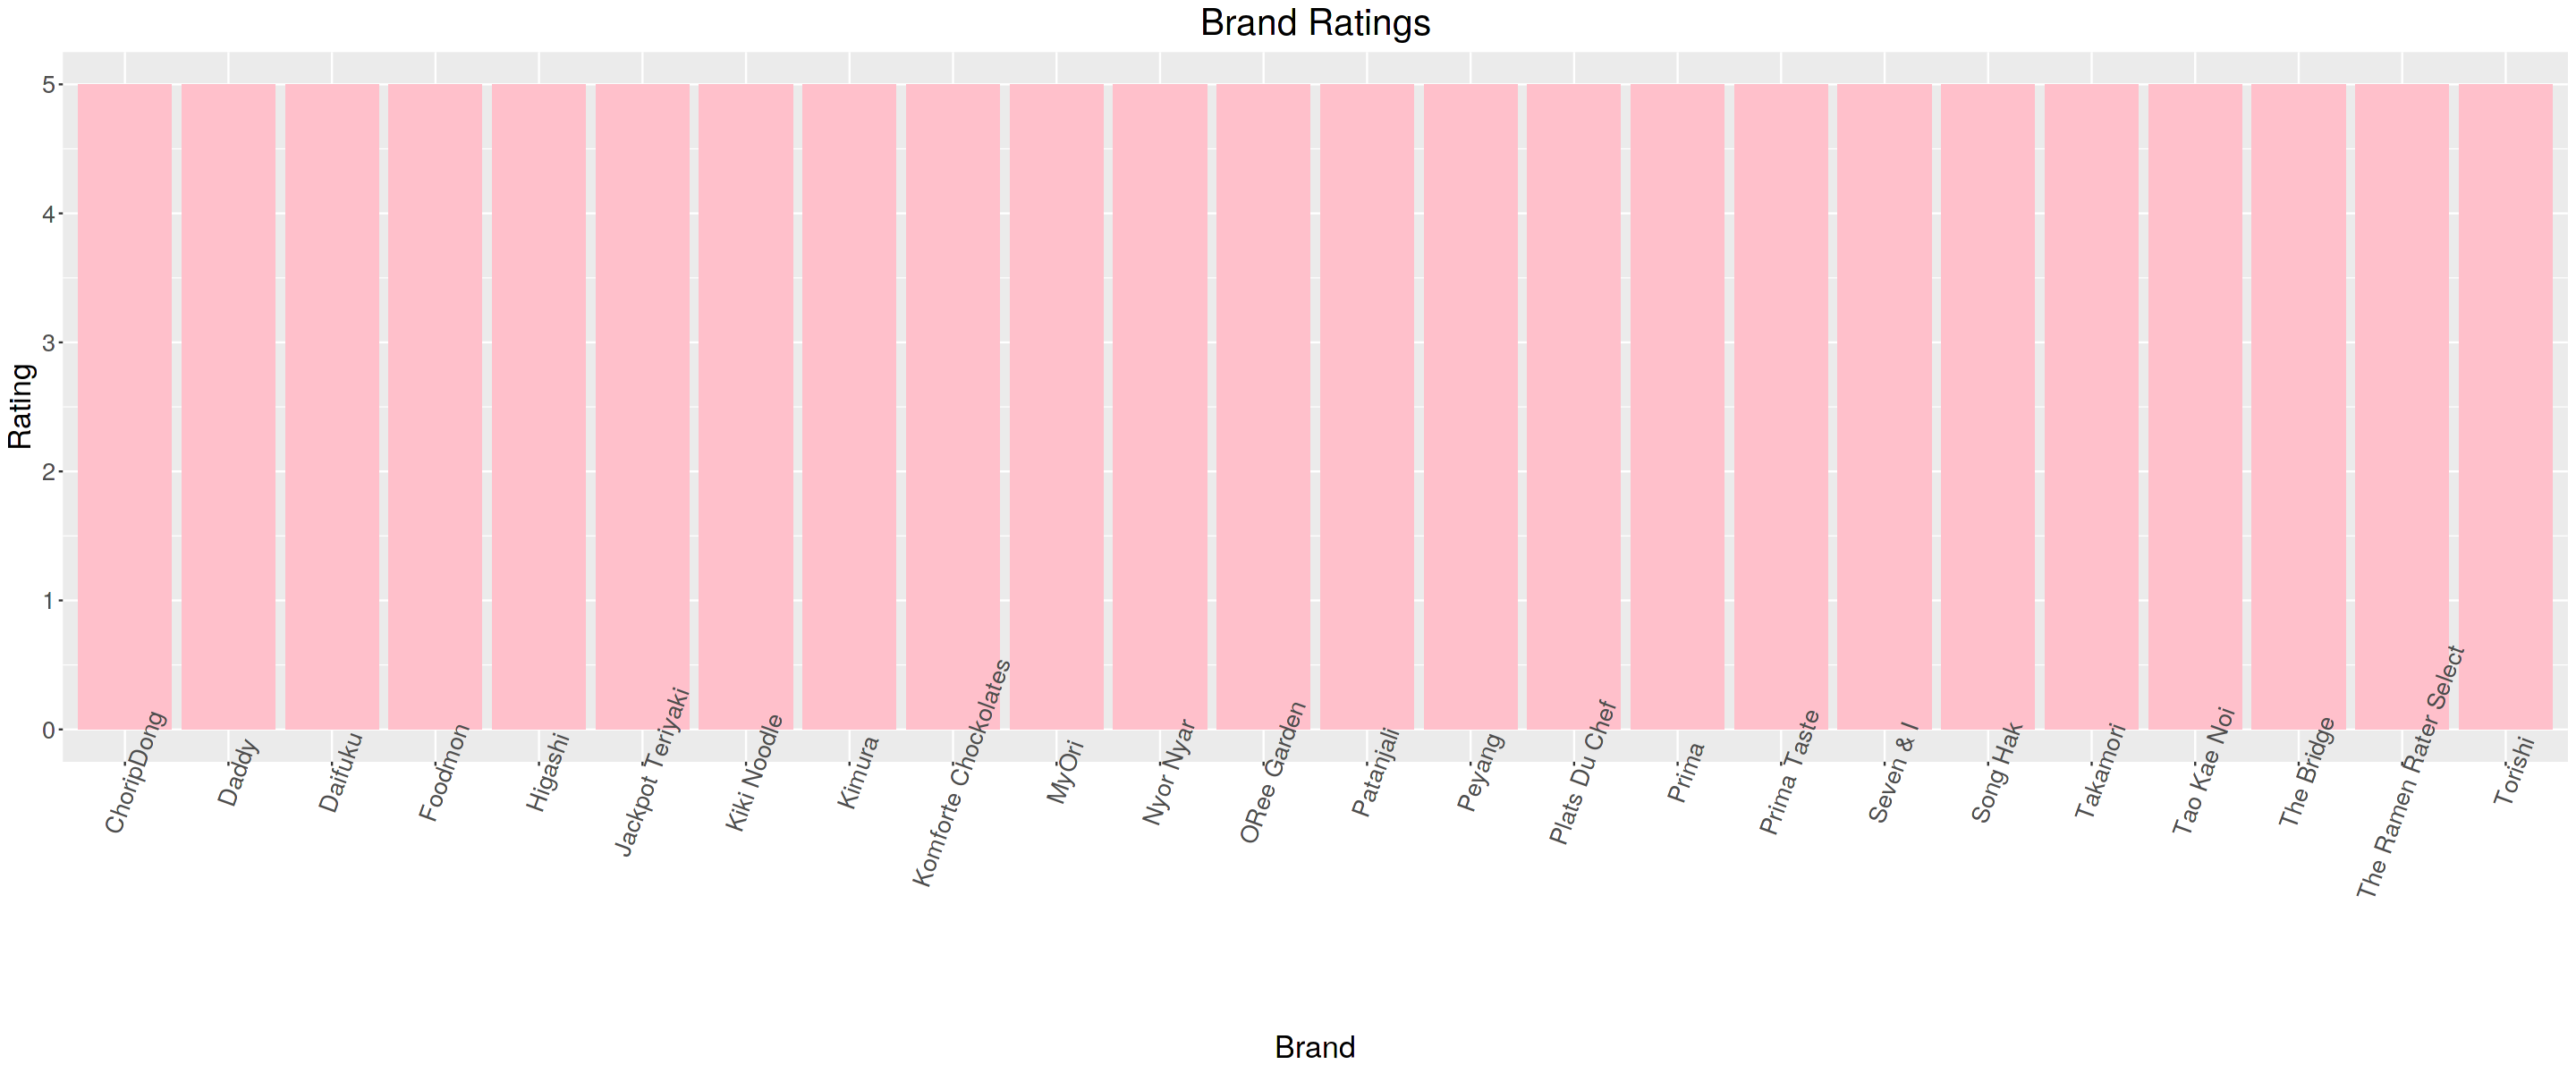

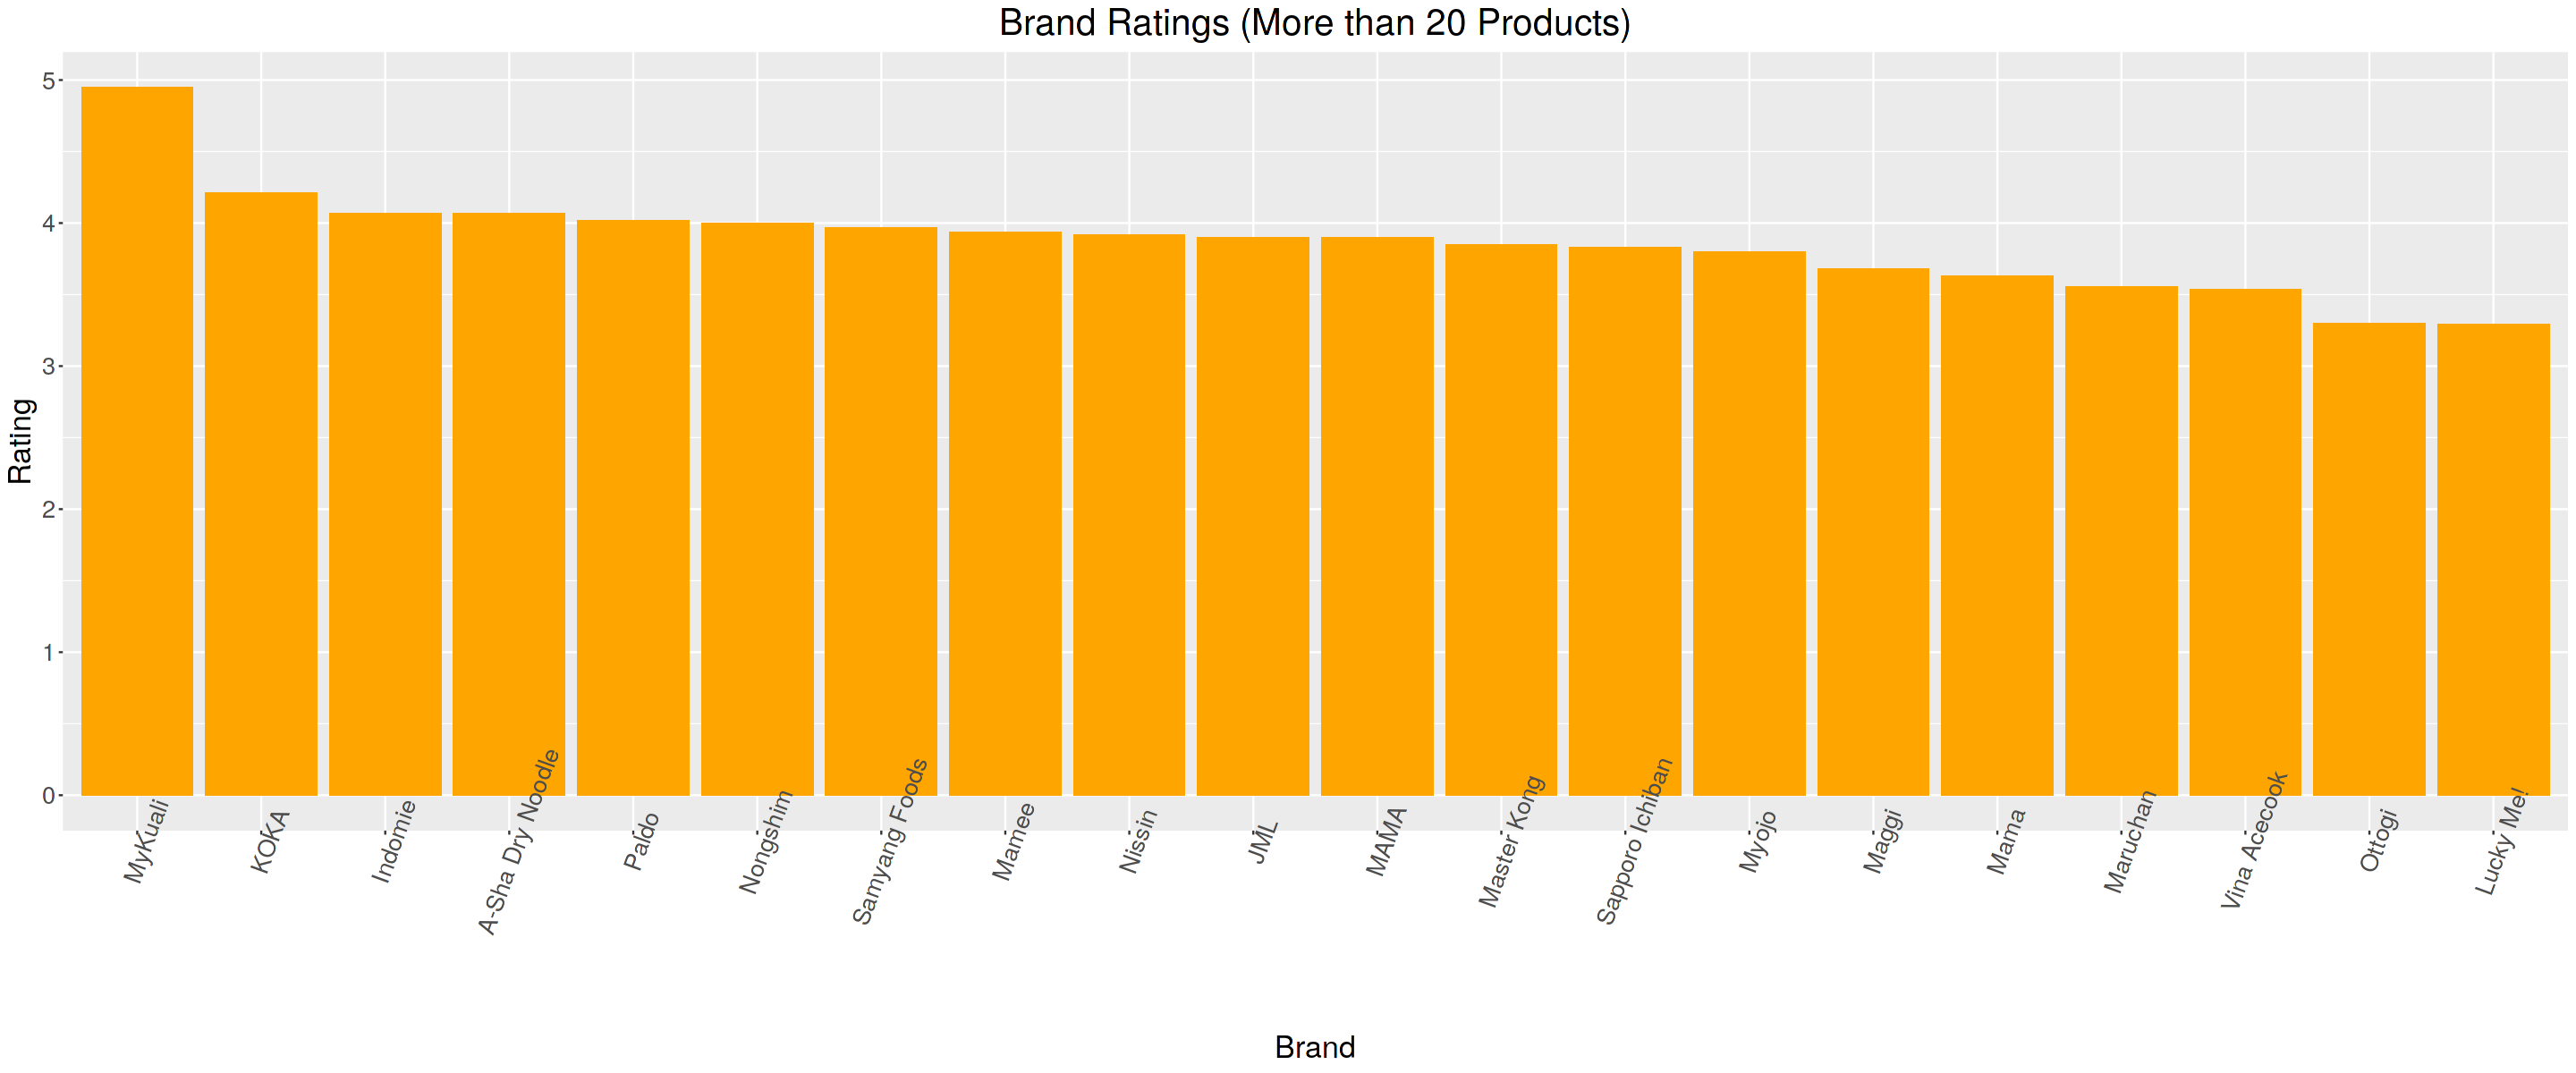

In [207]:
brandRating <- data.frame(as.numeric(ramen$Stars),ramen$Brand) #Create a dataframe out of the rating and the brand

brandRating <- brandRating %>% #Pipe a rename function into the brandRating dataframe
  rename(
    Rating = as.numeric.ramen.Stars., #Change the absurd rating name into simply Rating
    Brand = ramen.Brand #Change the ramen.brand into a simple Brand name
   )

brandRate <- brandRating %>% group_by(Brand) #Group the brandRating dataset by the Brand
brandRate <- brandRate %>% summarise( #Pipe a summarise function into the brandRate, making sure the rating functions congregate as means
   Rating = mean(Rating) #Set the ratings to mean based on the brand
)

dfBrand <- data.frame(brands) #Put the brand product counts set from earlier into a dataframe
dfBrand <- dfBrand %>% #Pipe a rename function into the brand product count dataframe
  rename(
    Brand = Var1, #Rename the brand column to Brand from its default Var1 as to match the brandRate dataframe
    Count = Freq #Rename the frequency variable to count because I like that better
  )

brandRate[, "Count"] <- dfBrand$Count #Add the count to the brandRate dataframe so it can be used as a subset later
brandRate <- transform(brandRate, Brand = reorder(Brand, -Rating) ) #Sort the data by rating

#Plot to show the top 20 brands regardless of product count
top_n(brandRate, n = 20, Rating) %>% #Pipe the top 20 rating into the plot
          ggplot(., mapping = aes(x = Brand, y = Rating)) + #Build a plot based on the brand and rating
                geom_bar(stat='identity', fill = "pink") + #Make the bars pink to distinguish the plot from the orange one
                theme(text = element_text(size = 20), #Make the brand name text larger
                      plot.title = element_text(hjust = 0.5), #Center the plot title
                      axis.text.x = element_text(angle = 70)) +  #Rotate the brand names to make sure they do not mesh
                ggtitle("Brand Ratings") #Add the title to the graph

#Plot to show the top 20 brands with a product count above 20
top_n(subset(brandRate, Count > 20), n = 20, Rating) %>% #Pipe the top 20 rating with count above 20 into the plot
          ggplot(., mapping = aes(x = Brand, y = Rating)) + #Build a plot based on the brand and rating
                geom_bar(stat='identity', fill = "orange") + #Make the bars orange to distinguish the plot from the pink one
                theme(text = element_text(size = 20), #Make the brand name text larger
                      plot.title = element_text(hjust = 0.5), #Center the plot title
                      axis.text.x = element_text(angle = 70)) + #Rotate the brand names
                ggtitle("Brand Ratings (More than 20 Products)") #Add the title to the graph

The above graphs contain the best ramen brands based on rating. 

The first looks at the brands without regarding the product count. Every element in that graph has a rating of 5, as it is much easier to maintain a 5 rating with fewer products.

The second looks at brands with 20 or more products. This represents the bigger companies by product count, so it is a lot harder for them to hold a high rating. Despite this, every product in the top 20 has a rating above three stars. The top 5 companies in terms of product count are all here, but they are all outranked in rating by MyKuali, KOKA, and Indomie. After looking into those brands further (via Google), they all appear to be local brands to various areas, hence why I had not heard of them before. They all appear to be beloved brands of their respective areas, so they are something to keep in mind for people looking for something new. The MyKuali at least has listings on Amazon (4 packs for 10 dollars), which is more expensive, but is probably worth it for the highest rated brand (https://www.amazon.com/MyKuali-Penang-White-Curry-Noodle/dp/B00NKN7CQE).